In [3]:
import os
import torch
import pytorch_lightning as pl
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from omegaconf import OmegaConf
from PIL import Image
from torchvision import transforms

from ldm.models.autoencoder import VQModelRetrainable, AutoencoderKL
from ldm.util import instantiate_from_config
from ldm.data.imagenet import ImageNetTrain, ImageNetValidation

from pytorch_lightning.trainer import Trainer

### Create model from config and load checkpoint

In [4]:
modeldir = '../models/first_stage_models/kl-f16/'
config = OmegaConf.load(os.path.join(modeldir, 'config.yaml'))
model = instantiate_from_config(config.model)
model.init_from_ckpt(os.path.join(modeldir, 'model.ckpt'))

making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 16, 16, 16) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
Restored from ../models/first_stage_models/kl-f16/model.ckpt


### Load ImageNet dataset

In [69]:
data = ImageNetTrain()
batch = []
for i in range(5):
    batch.append(torch.tensor(data[i]['image']).permute(2,0,1))
batch = torch.stack(batch, 0)

Removed 1 files from filelist during filtering.


In [70]:
batch.shape

torch.Size([5, 3, 256, 256])

### Load MERL example

In [6]:
data = Image.open("./img/merl.png")
data = data.convert("RGB")
data = np.array(data)
batch = transforms.ToTensor()(data).unsqueeze(0)

In [7]:
batch.shape

torch.Size([1, 3, 256, 256])

### Validate model

In [8]:
dec, _ = model.forward(batch)
dec = dec.detach()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


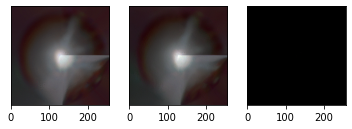

In [9]:
imgidx = 0
f, axarr = plt.subplots(1,3)
for ax in axarr:
    ax.get_yaxis().set_visible(False)
axarr[0].imshow(batch[imgidx].permute(1,2,0))
axarr[1].imshow(dec[imgidx].permute(1,2,0))
axarr[2].imshow(( batch[imgidx].permute(1,2,0) - dec[imgidx].permute(1,2,0) )**2)